### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 500

### Data Cleaning and Feature Engineering

In [2]:
df2 = pd.read_csv('../data/comments.csv')

df2.head(3)

,subreddit,author,body
0,Eldenring,mistahARK,"At the same time, if it isn't shown, Geoff has been willfully hyping us up for yet another event with only the thinnest plausible deniability. It's not hard to just not play into it if there's nothing to be hyped about, but of course, that would not benefit SGF numbers 🙃\n\n**If** it isn't shown, of course."
1,Eldenring,Beeniemcg,Wait? When is this? I thought it was on sunday?!
2,Eldenring,mrawesome11234,I planned the post on time and on the dot just 1 more day of hollowing


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  4000 non-null   object
 1   author     4000 non-null   object
 2   body       4000 non-null   object
dtypes: object(3)
memory usage: 93.9+ KB


In [4]:
df2.isna().sum()

subreddit    0
author       0
body         0
dtype: int64

In [5]:
df2['subreddit'].value_counts()

Eldenring        2000
StardewValley    2000
Name: subreddit, dtype: int64

In [6]:
#removed puncutation from text -- found expression in stackoverflow
df2['body'] = df2['body'].str.replace(r'[^\w\s]', '')

#set regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df2['tokenized'] = df2['body'].apply(lambda x: tokenizer.tokenize(x))

df2.head(3)

/var/folders/j4/fj647cj14gd9kk21c0z8rmm00000gn/T/ipykernel_4597/2679282473.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['body'] = df2['body'].str.replace(r'[^\w\s]', '')


,subreddit,author,body,tokenized
0,Eldenring,mistahARK,At the same time if it isnt shown Geoff has been willfully hyping us up for yet another event with only the thinnest plausible deniability Its not hard to just not play into it if theres nothing to be hyped about but of course that would not benefit SGF numbers \n\nIf it isnt shown of course,"[At, the, same, time, if, it, isnt, shown, Geoff, has, been, willfully, hyping, us, up, for, yet, another, event, with, only, the, thinnest, plausible, deniability, Its, not, hard, to, just, not, play, into, it, if, theres, nothing, to, be, hyped, about, but, of, course, that, would, not, benefit, SGF, numbers, If, it, isnt, shown, of, course]"
1,Eldenring,Beeniemcg,Wait When is this I thought it was on sunday,"[Wait, When, is, this, I, thought, it, was, on, sunday]"
2,Eldenring,mrawesome11234,I planned the post on time and on the dot just 1 more day of hollowing,"[I, planned, the, post, on, time, and, on, the, dot, just, 1, more, day, of, hollowing]"


In [7]:
#added additional stop words to review the name of the games
custom_stopwords = ['elden',
                    'ring',
                    'stardew',
                    'valley',
                   'just',
                    'like',
                    'think',
                    'game',
                    'games',
                   'im',
                   'dont',
                   'ive',
                   'thats',
                   'youre',
                    'play',
                    'playing',
                    'time',
                    'think',
                    'thought',
                   'make',
                   'new',
                   'did',
                   'does',
                   'really',
                   'actually',
                   'sure',
                   'thing',
                   'good',
                   'know',
                   'need',
                   'want',
                   'theres',
                   'didnt']

stop_words = text.ENGLISH_STOP_WORDS.union(custom_stopwords)

#set lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
df2['lemmatized'] = df2['tokenized'].apply(lambda word_list:' '.join([lemmatizer.lemmatize(x) for x in word_list]))

#found how to apply lemmatizer through stackoverflow
p_stemmer = PorterStemmer()
df2['stemmed'] = df2['tokenized'].apply(lambda word_list:' '.join([p_stemmer.stem(x) for x in word_list]))

df2.head(3)

,subreddit,author,body,tokenized,lemmatized,stemmed
0,Eldenring,mistahARK,At the same time if it isnt shown Geoff has been willfully hyping us up for yet another event with only the thinnest plausible deniability Its not hard to just not play into it if theres nothing to be hyped about but of course that would not benefit SGF numbers \n\nIf it isnt shown of course,"[At, the, same, time, if, it, isnt, shown, Geoff, has, been, willfully, hyping, us, up, for, yet, another, event, with, only, the, thinnest, plausible, deniability, Its, not, hard, to, just, not, play, into, it, if, theres, nothing, to, be, hyped, about, but, of, course, that, would, not, benefit, SGF, numbers, If, it, isnt, shown, of, course]",At the same time if it isnt shown Geoff ha been willfully hyping u up for yet another event with only the thinnest plausible deniability Its not hard to just not play into it if there nothing to be hyped about but of course that would not benefit SGF number If it isnt shown of course,at the same time if it isnt shown geoff ha been will hype us up for yet anoth event with onli the thinnest plausibl deniabl it not hard to just not play into it if there noth to be hype about but of cours that would not benefit sgf number if it isnt shown of cours
1,Eldenring,Beeniemcg,Wait When is this I thought it was on sunday,"[Wait, When, is, this, I, thought, it, was, on, sunday]",Wait When is this I thought it wa on sunday,wait when is thi i thought it wa on sunday
2,Eldenring,mrawesome11234,I planned the post on time and on the dot just 1 more day of hollowing,"[I, planned, the, post, on, time, and, on, the, dot, just, 1, more, day, of, hollowing]",I planned the post on time and on the dot just 1 more day of hollowing,i plan the post on time and on the dot just 1 more day of hollow


In [8]:
#set count vectorizer
cvec = CountVectorizer(stop_words=stop_words, ngram_range=(1,2))
#found token_pattern to incorporate any character (emojis) in stackoverflow (cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(1,2))

C = df2['body']

cveccomment = cvec.fit_transform(C)

cveccommentdf = pd.DataFrame(cveccomment.todense(),
                            columns=cvec.get_feature_names())

cveccommentdf.head(3)

,000,0000,0000 zones,009,009 chance,01,01 01,01 otoh,0100,0100 originality,...,zusak,zusak hes,zuzu,zuzu city,zweihander,zweihander favorite,äny,äny böööööömbs,𝘴𝘭𝘰𝘷𝘤𝘩𝘺,𝘴𝘭𝘰𝘷𝘤𝘩𝘺 3305
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
games = df2.drop(columns=['author', 'body', 'lemmatized', 'stemmed', 'tokenized'])

In [10]:
games['og_subreddit'] = games['subreddit']
games.drop(columns=['subreddit'], inplace=True)

games.head()

#got help from TA discovering that subreddit was producing duplicate indexes in following dataframe creation

,og_subreddit
0,Eldenring
1,Eldenring
2,Eldenring
3,Eldenring
4,Eldenring


In [11]:
df3 = pd.concat([cveccommentdf, games], axis=1)

df3.shape

(4000, 37357)

In [12]:
elden = df3[df3['og_subreddit'] == 'Eldenring']
stardew = df3[df3['og_subreddit'] == 'StardewValley']

In [13]:
elden.drop(columns=['og_subreddit'], inplace=True)
stardew.drop(columns=['og_subreddit'], inplace=True)

/Users/karenchien/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### EDA - Comments

In [14]:
eldenoverlap = elden.sum().sort_values(ascending=False).head(1867)

Text(0.5, 1.0, 'Elden Common Words')

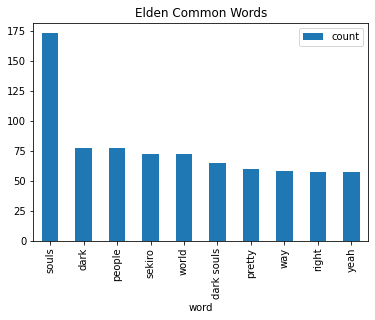

In [15]:
eldenoverlapdf = eldenoverlap.to_frame().reset_index()
eldenoverlapdf.rename(columns = {'index' : 'word', 0 : 'count'}, inplace = True)

eldentop10 = eldenoverlapdf.head(10)
eldentop10.plot.bar(x='word', y='count')
plt.title('Elden Common Words')

In [16]:
eldenoverlapdf.shape

(1867, 2)

In [17]:
eldenoverlapdf.describe()

,count
count,1867.000000
mean,6.998393
std,9.246157
min,2.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,173.000000


In [18]:
eldenoverlapdf.shape

(1867, 2)

In [19]:
eldenoverlapdf2 = eldenoverlapdf[eldenoverlapdf['count'] > 7]

In [20]:
stardewoverlap = stardew.sum().sort_values(ascending=False).head(1867)

Text(0.5, 1.0, 'Stardew Common Words')

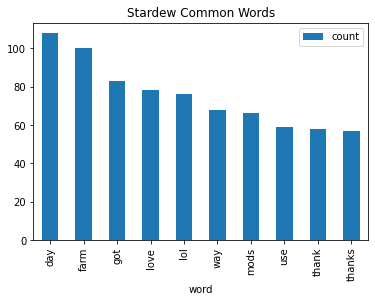

In [21]:
stardewoverlapdf = stardewoverlap.to_frame().reset_index()
stardewoverlapdf.rename(columns = {'index' : 'word', 0 : 'count'}, inplace = True)

stardewtop10 = stardewoverlapdf.head(10)
stardewtop10.plot.bar(x='word', y='count')
plt.title('Stardew Common Words')

In [22]:
stardewoverlapdf.describe()

,count
count,1867.000000
mean,7.937333
std,9.078308
min,2.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,108.000000


In [23]:
stardewoverlapdf2 = stardewoverlapdf[stardewoverlapdf['count'] > 7]

Text(0.5, 1.0, 'Overlapping Common Words')

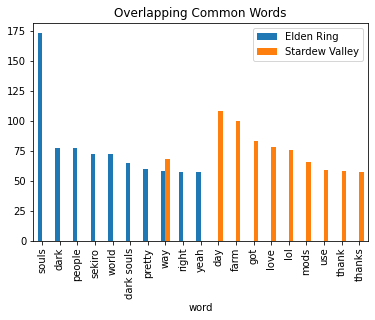

In [24]:
pd.merge(eldentop10,stardewtop10, how='outer', on=['word']).set_index('word').plot.bar()
plt.legend(['Elden Ring', 'Stardew Valley'])
plt.title('Overlapping Common Words')

In [25]:
common_words = stardewoverlapdf2[stardewoverlapdf2['word'].isin(eldenoverlapdf2['word'])]

common_words

common_words.to_csv('../data/overlappingwords.csv', index=False)

In [26]:
df2[df2['body'].str.lower().str.contains('fish')]

,subreddit,author,body,tokenized,lemmatized,stemmed
1566,Eldenring,SomaSimon,By fishing village are you referring to Mibu village Would the boss happen to be the gtCorrupted Monklt If so youre pretty close to an endgame area but theres still quite a bit of game left If I had to liken it to DS3 Id say youre at the top of Lothric castle with the two dragons,"[By, fishing, village, are, you, referring, to, Mibu, village, Would, the, boss, happen, to, be, the, gtCorrupted, Monklt, If, so, youre, pretty, close, to, an, endgame, area, but, theres, still, quite, a, bit, of, game, left, If, I, had, to, liken, it, to, DS3, Id, say, youre, at, the, top, of, Lothric, castle, with, the, two, dragons]",By fishing village are you referring to Mibu village Would the bos happen to be the gtCorrupted Monklt If so youre pretty close to an endgame area but there still quite a bit of game left If I had to liken it to DS3 Id say youre at the top of Lothric castle with the two dragon,by fish villag are you refer to mibu villag would the boss happen to be the gtcorrupt monklt if so your pretti close to an endgam area but there still quit a bit of game left if i had to liken it to ds3 id say your at the top of lothric castl with the two dragon
1820,Eldenring,mushroomglass,They have other ways of doing that though so it seems odd that theyd go that route Regardless something is fishy and theres a proverbial stillness in the air Were seeing something soon,"[They, have, other, ways, of, doing, that, though, so, it, seems, odd, that, theyd, go, that, route, Regardless, something, is, fishy, and, theres, a, proverbial, stillness, in, the, air, Were, seeing, something, soon]",They have other way of doing that though so it seems odd that theyd go that route Regardless something is fishy and there a proverbial stillness in the air Were seeing something soon,they have other way of do that though so it seem odd that theyd go that rout regardless someth is fishi and there a proverbi still in the air were see someth soon
2060,StardewValley,AnarchistBorganism,If you are having trouble with combat buy a better weapon if you arent then its a waste of money\n\nIf you are struggling with gold crops like parsnips that have a quick turnaround can multiply quickly if you reinvest all of your profits buying seeds up to the point where watering consumes all of the energy youre willing to spare then crops like potatoes radishes and eggplant are good for quick turnarounds with cauliflower melons and pumpkins being best for the long run Fishing is also a gre...,"[If, you, are, having, trouble, with, combat, buy, a, better, weapon, if, you, arent, then, its, a, waste, of, money, If, you, are, struggling, with, gold, crops, like, parsnips, that, have, a, quick, turnaround, can, multiply, quickly, if, you, reinvest, all, of, your, profits, buying, seeds, up, to, the, point, where, watering, consumes, all, of, the, energy, youre, willing, to, spare, then, crops, like, potatoes, radishes, and, eggplant, are, good, for, quick, turnarounds, with, cauliflow...",If you are having trouble with combat buy a better weapon if you arent then it a waste of money If you are struggling with gold crop like parsnip that have a quick turnaround can multiply quickly if you reinvest all of your profit buying seed up to the point where watering consumes all of the energy youre willing to spare then crop like potato radish and eggplant are good for quick turnaround with cauliflower melon and pumpkin being best for the long run Fishing is also a great way to make a...,if you are have troubl with combat buy a better weapon if you arent then it a wast of money if you are struggl with gold crop like parsnip that have a quick turnaround can multipli quickli if you reinvest all of your profit buy seed up to the point where water consum all of the energi your will to spare then crop like potato radish and eggplant are good for quick turnaround with cauliflow melon and pumpkin be best for the long run fish

### Observations
- Stardew Valley and Eldenring have distinct gameplay features that are reference in comments and posts
- Stardew Valley has a lot of agricultural items such as: fish, plant, fruit, crops, seeds, farm, year
- Stardew Valley are more likely to say thank you in comments
- Eldenring gameplay circulates around "souls", "boss", or "dark souls". These can be distinguishing words to classify these games

In [27]:
stardewwords = ['fish', 'plant', 'fruit', 'crop', 'seed', 'farm', 'day']
eldenwords = ['soul', 'boss', 'dark']

stardewtest = df2[df2['body'].str.lower().str.contains('|'.join(stardewwords))]
eldentest = df2[df2['body'].str.lower().str.contains('|'.join(eldenwords))]

In [28]:
stardewtest['subreddit'].value_counts()

StardewValley    376
Eldenring         64
Name: subreddit, dtype: int64

In [29]:
eldentest['subreddit'].value_counts()

Eldenring        221
StardewValley      7
Name: subreddit, dtype: int64

### Feature Engineering Notes
- Out of 4000 comments, by highlighting gameplay specific words, there's a potential to provide a meaningful feature for my model on about 17% of posts. This isn't as huge as posts (25% of posts incorporated gameplay specific words), but it can potentially give a boost to my model

In [30]:
df2['stardew_keywords'] = df2['body'].str.lower().str.contains('|'.join(stardewwords))
df2['elden_keywords'] = df2['body'].str.lower().str.contains('|'.join(eldenwords))

### Exporting

In [31]:
df2.head(3)

,subreddit,author,body,tokenized,lemmatized,stemmed,stardew_keywords,elden_keywords
0,Eldenring,mistahARK,At the same time if it isnt shown Geoff has been willfully hyping us up for yet another event with only the thinnest plausible deniability Its not hard to just not play into it if theres nothing to be hyped about but of course that would not benefit SGF numbers \n\nIf it isnt shown of course,"[At, the, same, time, if, it, isnt, shown, Geoff, has, been, willfully, hyping, us, up, for, yet, another, event, with, only, the, thinnest, plausible, deniability, Its, not, hard, to, just, not, play, into, it, if, theres, nothing, to, be, hyped, about, but, of, course, that, would, not, benefit, SGF, numbers, If, it, isnt, shown, of, course]",At the same time if it isnt shown Geoff ha been willfully hyping u up for yet another event with only the thinnest plausible deniability Its not hard to just not play into it if there nothing to be hyped about but of course that would not benefit SGF number If it isnt shown of course,at the same time if it isnt shown geoff ha been will hype us up for yet anoth event with onli the thinnest plausibl deniabl it not hard to just not play into it if there noth to be hype about but of cours that would not benefit sgf number if it isnt shown of cours,False,False
1,Eldenring,Beeniemcg,Wait When is this I thought it was on sunday,"[Wait, When, is, this, I, thought, it, was, on, sunday]",Wait When is this I thought it wa on sunday,wait when is thi i thought it wa on sunday,True,False
2,Eldenring,mrawesome11234,I planned the post on time and on the dot just 1 more day of hollowing,"[I, planned, the, post, on, time, and, on, the, dot, just, 1, more, day, of, hollowing]",I planned the post on time and on the dot just 1 more day of hollowing,i plan the post on time and on the dot just 1 more day of hollow,True,False


In [32]:
cleandf = df2[['subreddit', 'body', 'lemmatized', 'stemmed', 'stardew_keywords', 'elden_keywords']]
cleandf['type'] = 'Comments'

cleandf.head(3)

/var/folders/j4/fj647cj14gd9kk21c0z8rmm00000gn/T/ipykernel_4597/4192237229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['type'] = 'Comments'


,subreddit,body,lemmatized,stemmed,stardew_keywords,elden_keywords,type
0,Eldenring,At the same time if it isnt shown Geoff has been willfully hyping us up for yet another event with only the thinnest plausible deniability Its not hard to just not play into it if theres nothing to be hyped about but of course that would not benefit SGF numbers \n\nIf it isnt shown of course,At the same time if it isnt shown Geoff ha been willfully hyping u up for yet another event with only the thinnest plausible deniability Its not hard to just not play into it if there nothing to be hyped about but of course that would not benefit SGF number If it isnt shown of course,at the same time if it isnt shown geoff ha been will hype us up for yet anoth event with onli the thinnest plausibl deniabl it not hard to just not play into it if there noth to be hype about but of cours that would not benefit sgf number if it isnt shown of cours,False,False,Comments
1,Eldenring,Wait When is this I thought it was on sunday,Wait When is this I thought it wa on sunday,wait when is thi i thought it wa on sunday,True,False,Comments
2,Eldenring,I planned the post on time and on the dot just 1 more day of hollowing,I planned the post on time and on the dot just 1 more day of hollowing,i plan the post on time and on the dot just 1 more day of hollow,True,False,Comments


In [33]:
cleandf.to_csv('../data/cleancomments.csv', index=False)